In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
def draw_networkx_graph(data_filename):
    # Load the JSON data
    with open(data_filename, 'r') as file:
        data = json.load(file)

    # Create a directed graph
    G = nx.DiGraph()

    # Recursive function to add nodes and edges to the graph
    def add_to_graph(parent, child_list, child_name):
        for child in child_list:
            child_label = f"{child_name}: {child['pfn']}"
            G.add_node(child_label)
            G.add_edge(parent, child_label)
            # Check if child has its own children
            if child_name == "pgd":
                add_to_graph(child_label, child['p4ds'], "p4d")
            elif child_name == "p4d":
                add_to_graph(child_label, child['puds'], "pud")
            elif child_name == "pud":
                add_to_graph(child_label, child['pmds'], "pmd")
            elif child_name == "pmd":
                add_to_graph(child_label, child['ptes'], "pte")

    # Start constructing the graph from the top level
    for pgd in data['pgds']:
        pgd_label = f"pgd: {pgd['pfn']}"
        G.add_node(pgd_label)
        add_to_graph(pgd_label, pgd['p4ds'], "p4d")

    # Draw the graph
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight='bold')
    plt.title("Page Table Visualization")
    plt.show()

In [3]:
def draw_graphviz_graph(data_filename):
    # Load the JSON data
    with open(data_filename, 'r') as file:
        data = json.load(file)

    # Create a directed graph
    G = nx.DiGraph()

    # Recursive function to add nodes and edges to the graph
    def add_to_graph(parent, child_list, child_name):
        for child in child_list:
            child_label = f"{child_name}_{child['pfn']}"
            G.add_node(child_label)
            G.add_edge(parent, child_label)
            # Check if child has its own children
            if child_name == "pgd":
                add_to_graph(child_label, child['p4ds'], "p4d")
            elif child_name == "p4d":
                add_to_graph(child_label, child['puds'], "pud")
            elif child_name == "pud":
                add_to_graph(child_label, child['pmds'], "pmd")
            elif child_name == "pmd":
                add_to_graph(child_label, child['ptes'], "pte")

    # Start constructing the graph from the top level
    for pgd in data['pgds']:
        pgd_label = f"pgd_{pgd['pfn']}"
        G.add_node(pgd_label)
        add_to_graph(pgd_label, pgd['p4ds'], "p4d")

    # Draw the graph using the Graphviz layout
    pos = graphviz_layout(G, prog="dot")
    plt.figure(figsize=(20, 20))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight='bold')
    plt.title("Page Table Visualization")
    plt.show()

/tmp/ipykernel_62654/1487346933.py:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


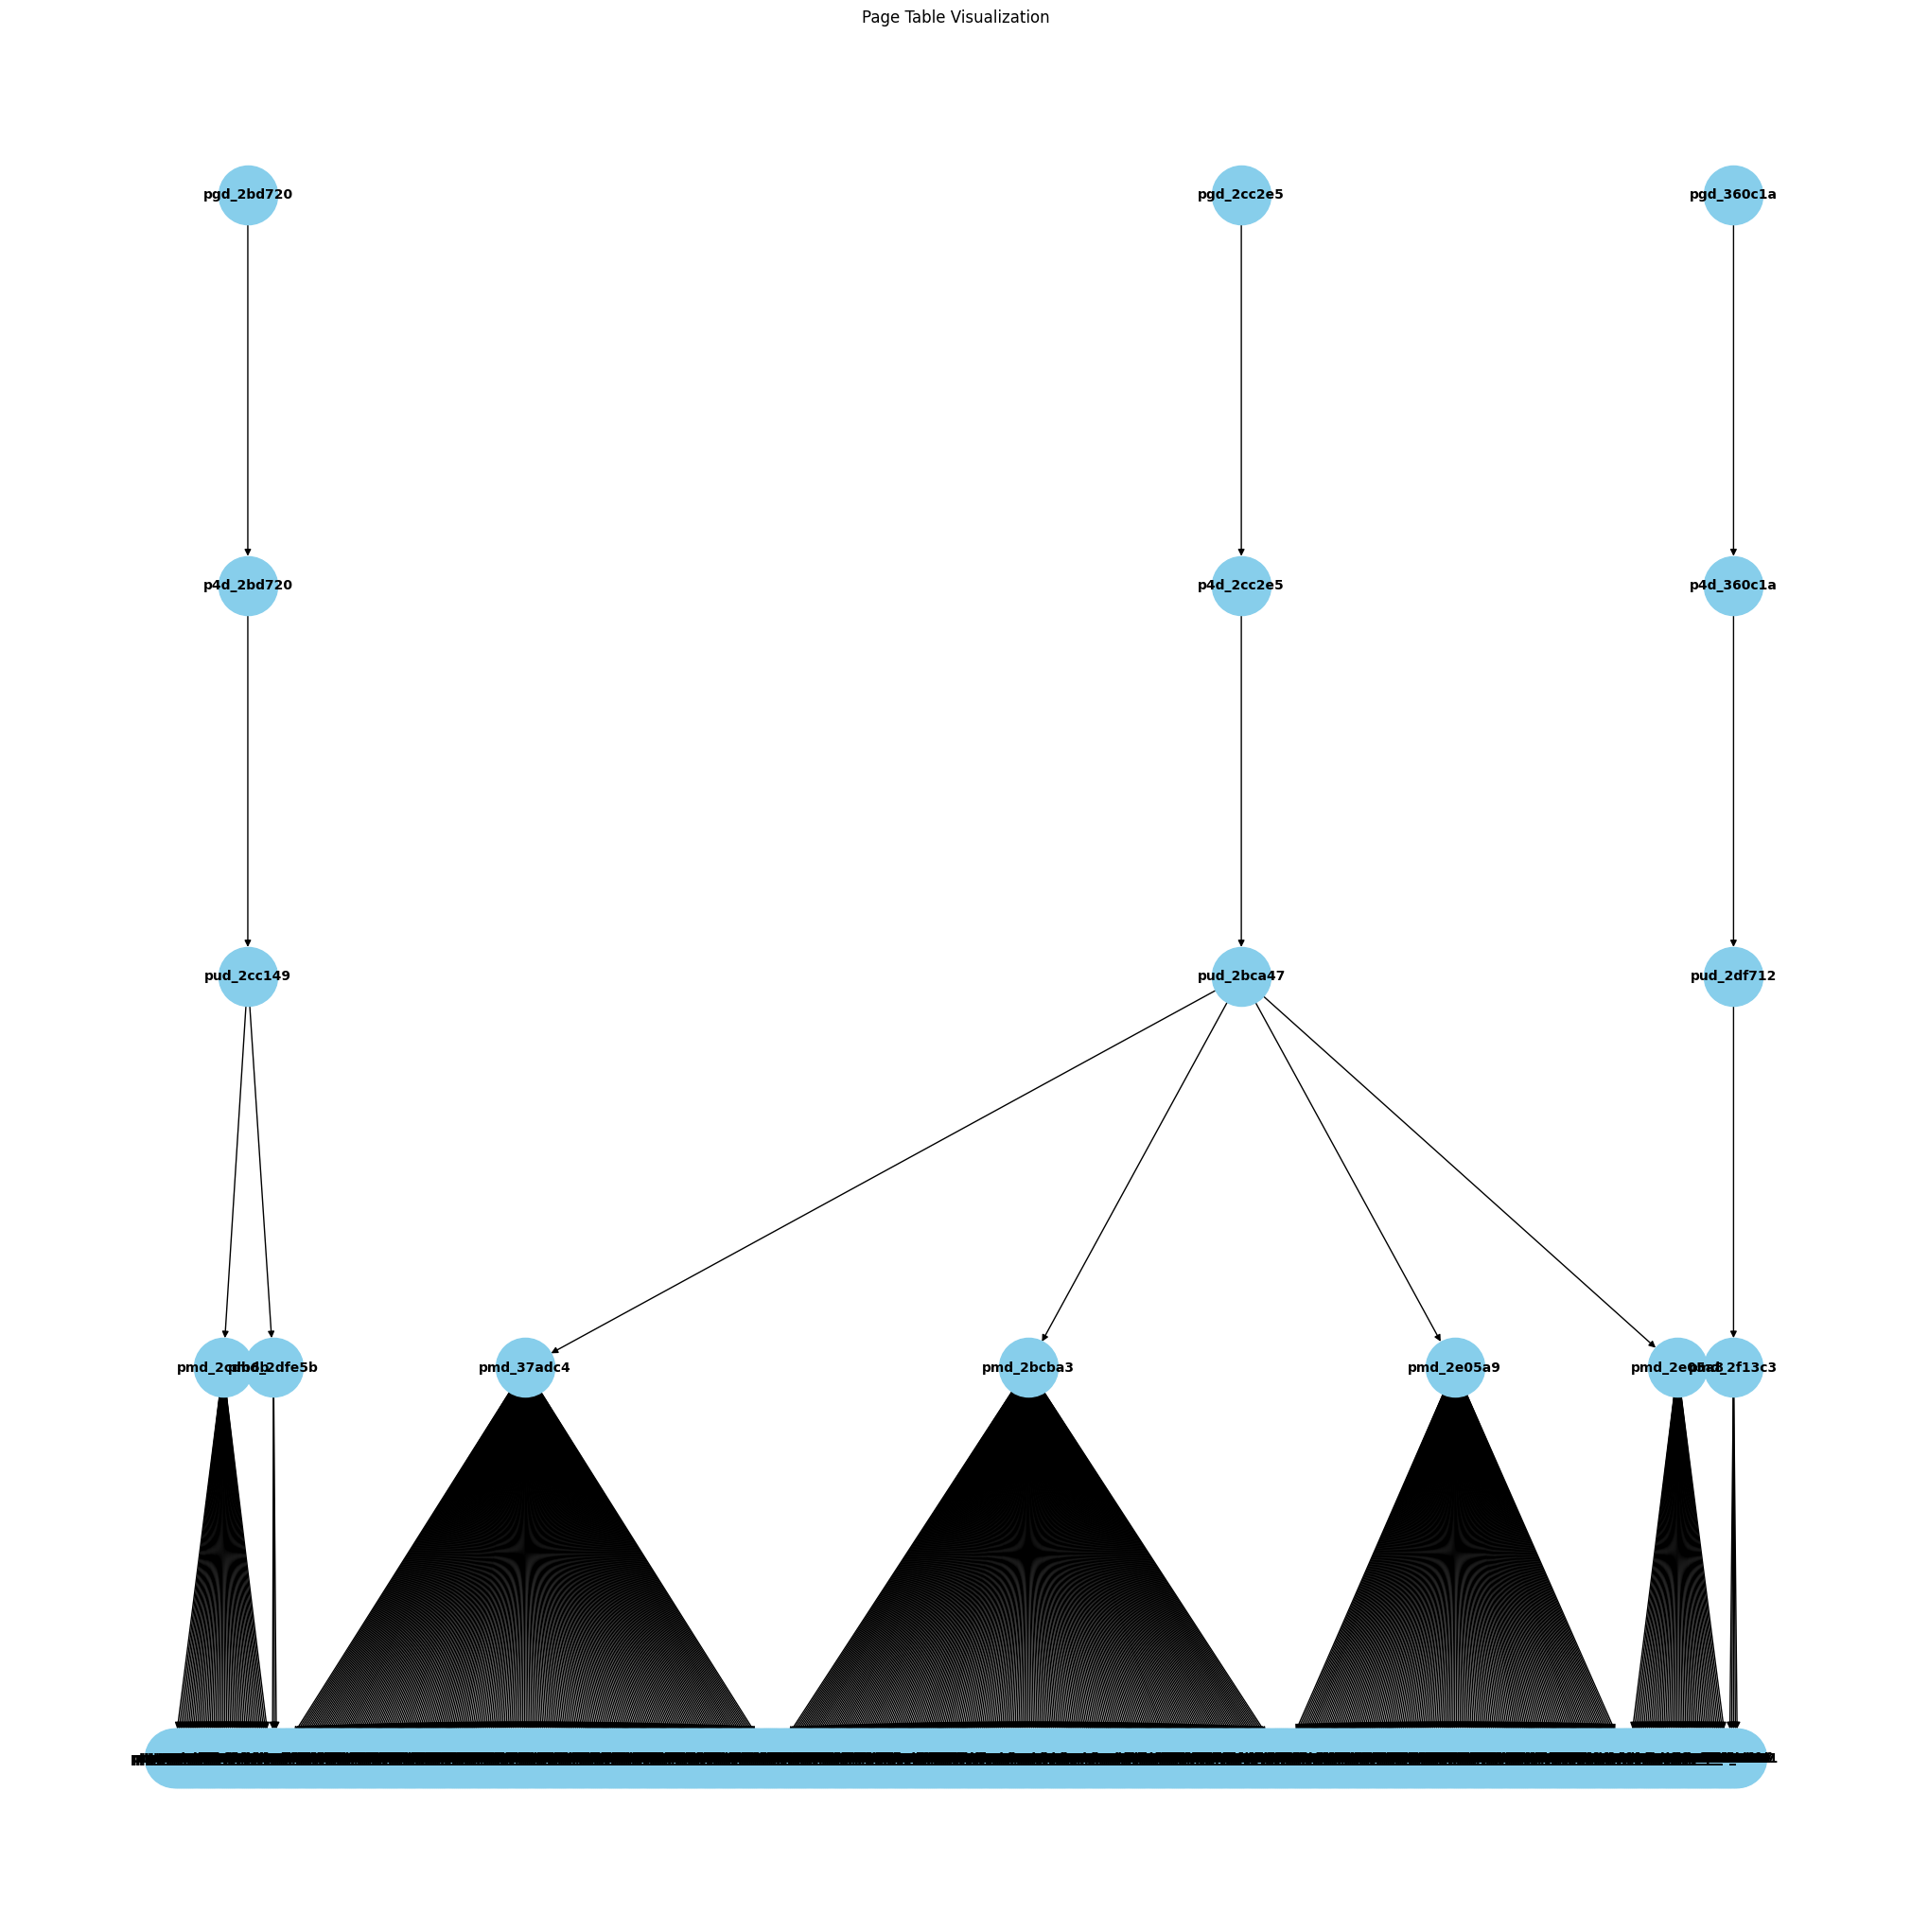

/tmp/ipykernel_62654/1487346933.py:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


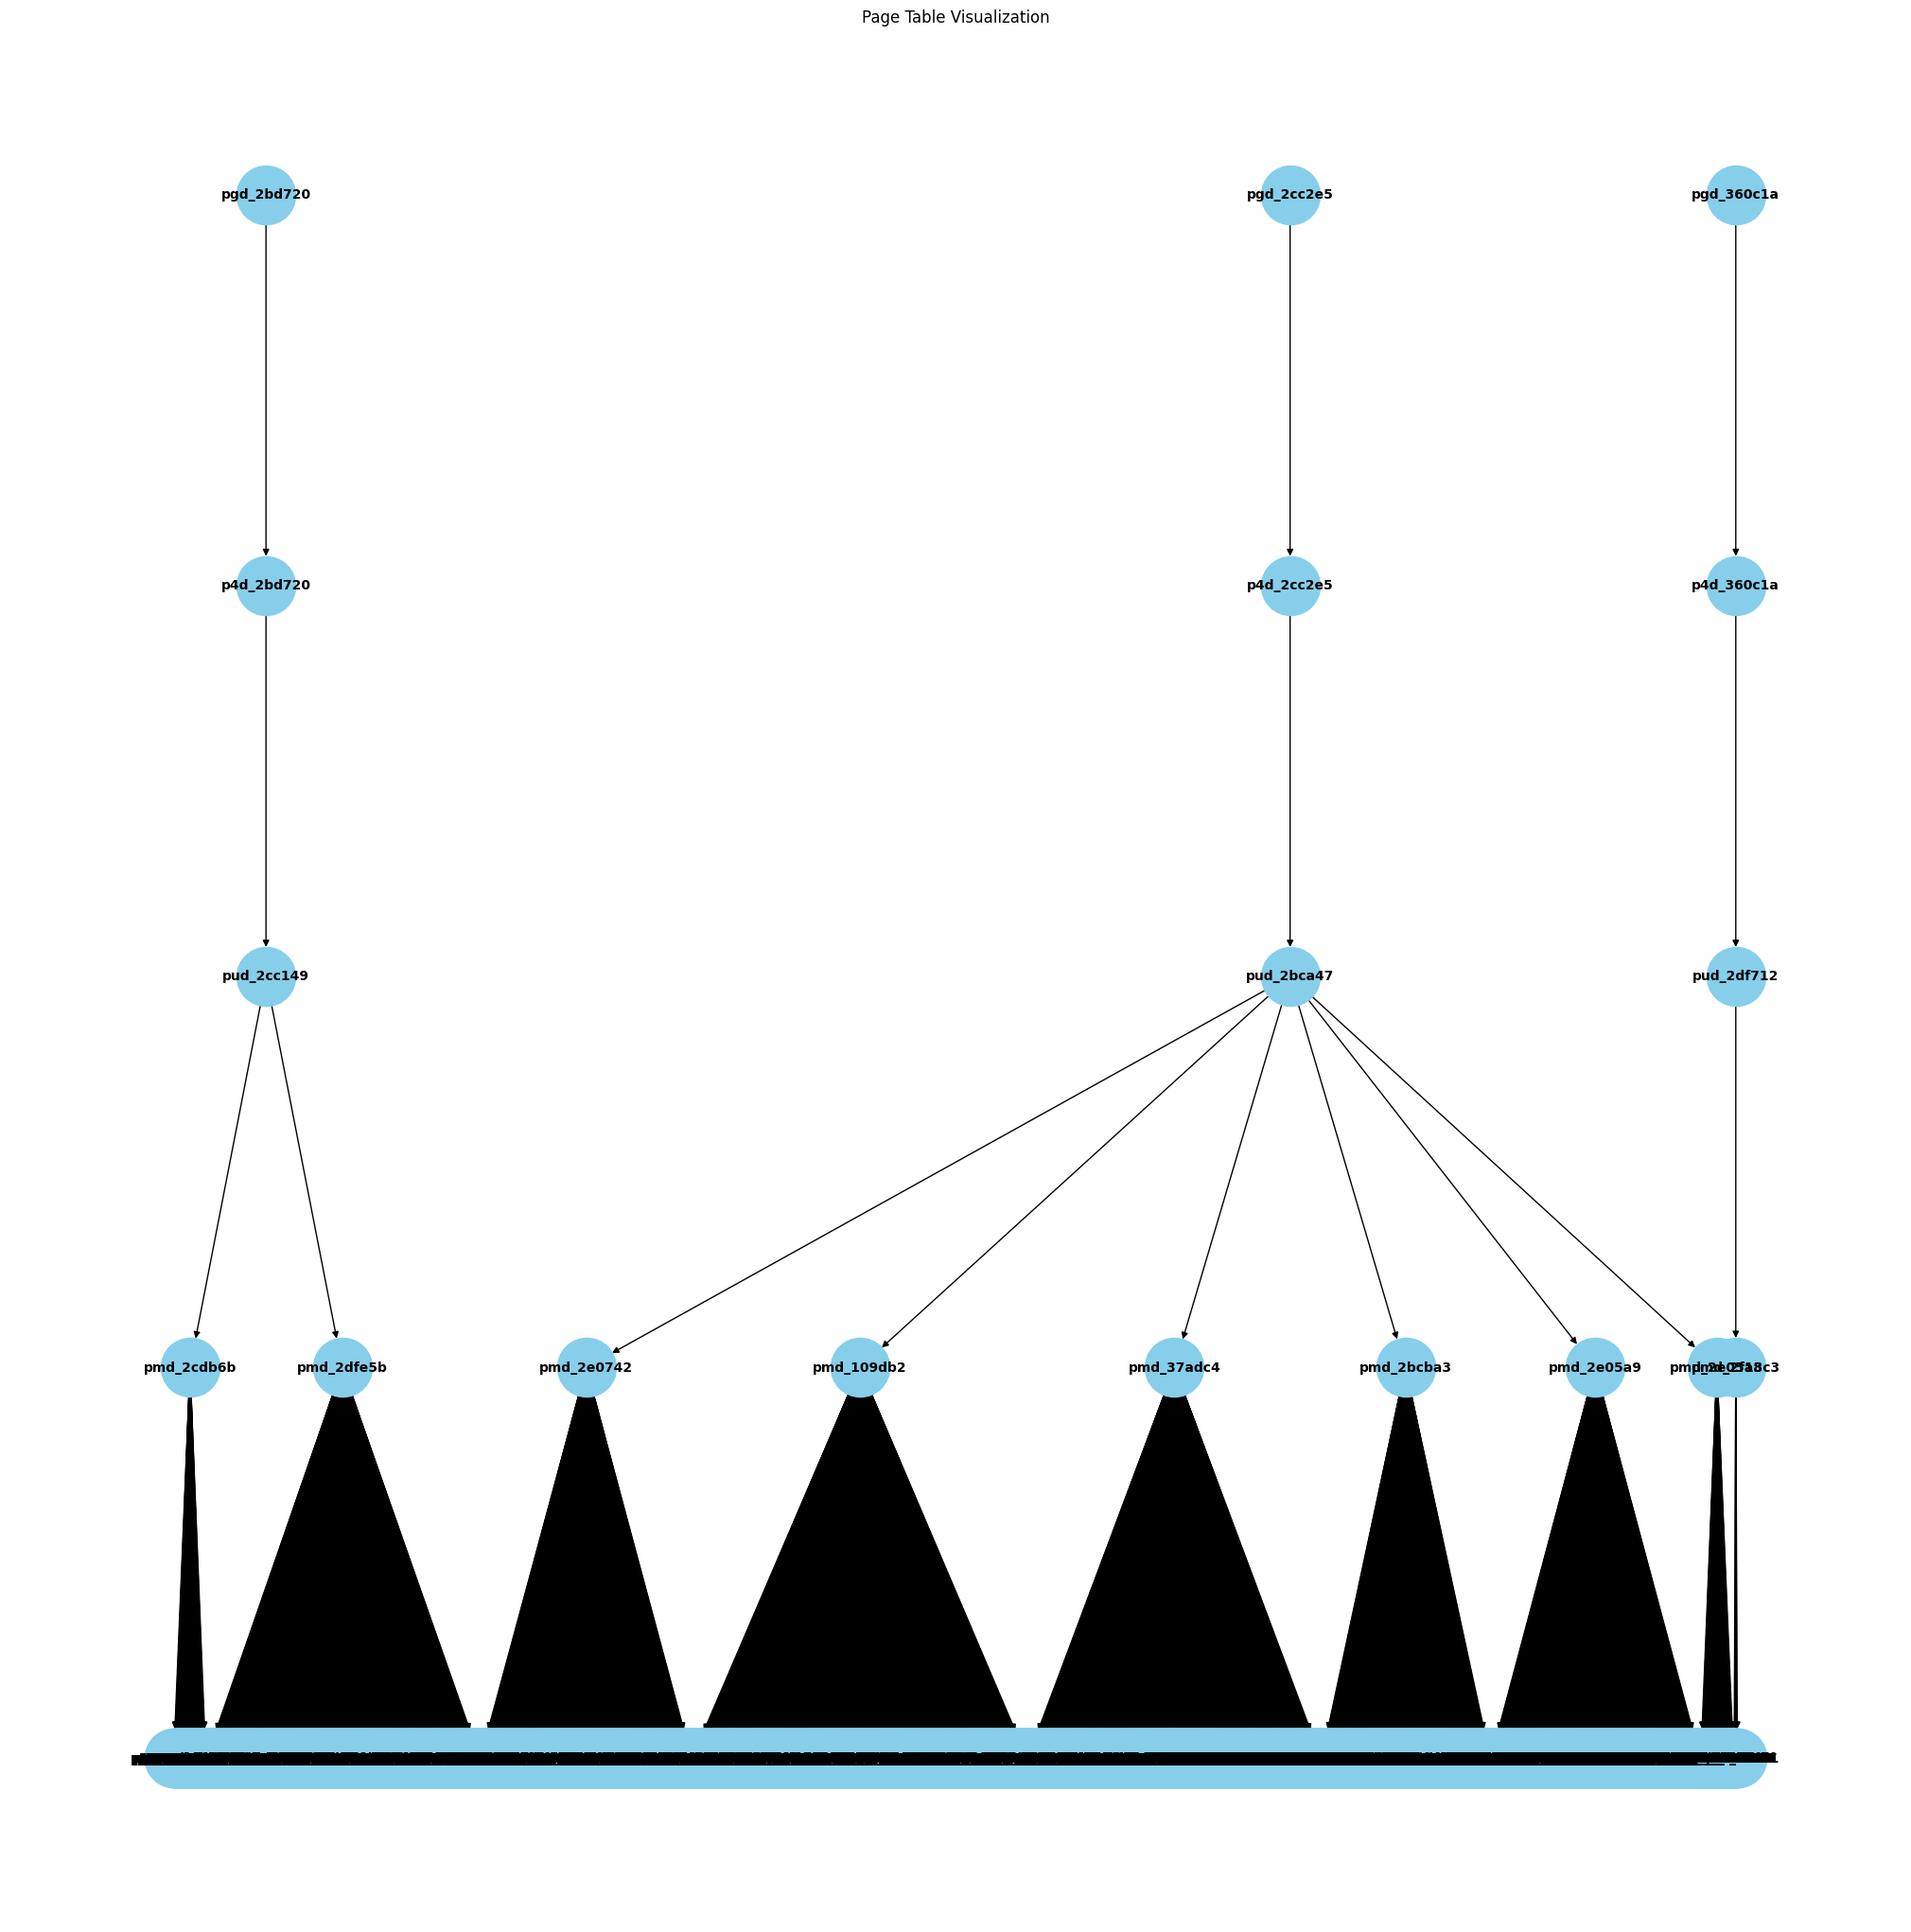

In [4]:
draw_graphviz_graph('pte_dump_before.json')
draw_graphviz_graph('pte_dump_after.json')

In [5]:
draw_networkx_graph('pte_dump_before.json')
draw_networkx_graph('pte_dump_after.json')

In [ ]:
def build_tree(G, data, parent_name='', path=''):
    """
    Recursively build the tree diagram from the nested dictionary
    """
    if isinstance(data, dict):
        for k, v in data.items():
            node_name = f"{path}_{k}"
            G.add_edge(parent_name, node_name)
            build_tree(G, v, node_name, node_name)
    elif isinstance(data, list):
        for index, item in enumerate(data):
            node_name = f"{path}_{index}"
            G.add_edge(parent_name, node_name)
            build_tree(G, item, node_name, f"{path}_{index}")

def draw_tree(json_data):
    """
    Draw the tree diagram from the parsed JSON data
    """
    G = nx.DiGraph()
    root = list(json_data.keys())[0]
    G.add_node(root)
    build_tree(G, json_data[root], root, root)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
    plt.show()

# Load JSON data
with open("pte_dump_before.json", 'r') as f:
    data = json.load(f)

draw_tree(data)